# Insulin 예측


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

## Insulin이 0보다 큰 값의 데이터만 사용

In [14]:
df = df[df["Insulin"] > 0]
print(df.shape)
df.head()

(394, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [15]:
label = "Insulin"
label

'Insulin'

## train & test split with sample

In [24]:
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

In [25]:
train.shape, test.shape

((315, 9), (79, 9))

In [29]:
x_train = train.drop(columns=label)
y_train = train[label]
x_test = test.drop(columns=label)
y_test = test[label]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((315, 8), (315,), (79, 8), (79,))

## DNN 생성

In [52]:
import tensorflow as tf

In [53]:
input_shape = len(x_train.columns)
input_shape

8

In [54]:
model = tf.keras.models.Sequential([
    # 입력층
    tf.keras.layers.Dense(128, activation='relu', input_shape=[input_shape]),
    
    # 은닉층
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # 출력층
    tf.keras.layers.Dense(1)])

In [55]:
model.compile(optimizer='rmsprop',
              loss=['mae', 'mse'],
              metrics=['mae', 'mse'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1152      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,305
Trainable params: 34,305
Non-trai

## fit

In [57]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=100)

history = model.fit(x_train, y_train, epochs=1000, verbose=0, 
                    callbacks=[early_stop], validation_split=0.2)

In [58]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,93.002365,93.002365,18482.623047,65.581818,65.581818,14615.404297
1,70.850136,70.850136,11893.724609,65.187080,65.187080,13124.792969
2,66.327477,66.327477,10841.630859,65.411842,65.411842,12754.203125
3,71.319672,71.319672,12055.779297,65.017105,65.017105,13044.937500
4,67.216576,67.216576,10618.577148,67.495476,67.495476,12195.234375
...,...,...,...,...,...,...
105,60.864086,60.864086,8922.274414,64.609299,64.609299,13069.795898
106,60.037186,60.037186,8406.978516,65.483635,65.483635,12582.111328
107,60.674873,60.674873,8558.016602,65.590515,65.590515,12460.055664
108,61.304779,61.304779,8912.750000,65.251846,65.251846,12504.246094


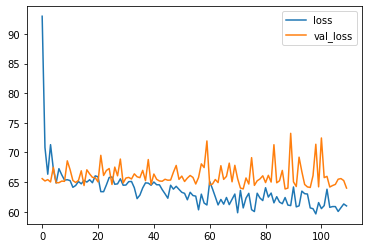

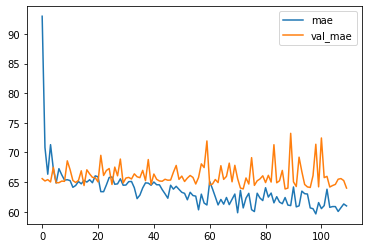

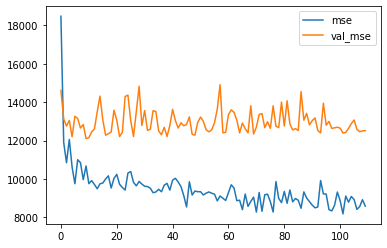

In [61]:
df_hist[["loss", "val_loss"]].plot()
df_hist[["mae", "val_mae"]].plot()
df_hist[["mse", "val_mse"]].plot()

## predict

In [62]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [69]:
y_predict = y_pred.flatten()
y_predict[:5]

array([181.3283  , 119.9671  ,  63.573265, 102.39793 ,  71.199585],
      dtype=float32)

In [67]:
loss, mae, mse = model.evaluate(x_test, y_test)
print("loss \t: ", loss)
print("mae \t: ", mae)
print("mse \t: ", mse)

3/3 [==============================] - 0s 5ms/step - loss: 61.1899 - mae: 61.1899 - mse: 10303.3213
loss 	:  61.18992233276367
mae 	:  61.18992233276367
mse 	:  10303.3212890625


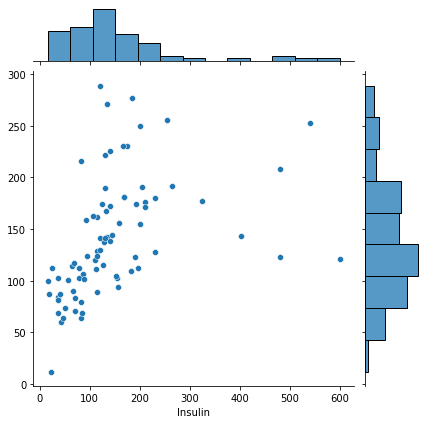

In [68]:
sns.jointplot(x=y_test, y=y_predict)